<a href="https://colab.research.google.com/github/Prasanna2000/final-year-project/blob/main/Forest_Fire_Detection_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "/content/drive/MyDrive/Project/project-dataset-forest-fire.zip" -d "/content/data"

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

train_data = []
train_labels = []

test_data = []
test_labels = []

img_ht = 192
img_wt = 192
train_dir = "/content/data/Data/Train_Data"
test_dir = "/content/data/Data/Test_Data"

for cls in ["Fire", "Non_Fire"]:
  for img in os.listdir(train_dir + "/" + cls):
    image = cv2.imread(train_dir + "/" + cls + "/" + img)
    if image is not None:
      image = cv2.resize(image, (img_ht, img_wt))
      train_data.append(image)
      train_labels.append(0 if cls=="Fire" else 1)

train_dir = "/content/data/Data/Train_Data"
for cls in ["Fire", "Non_Fire"]:
  for img in os.listdir(test_dir + "/" + cls):
    image = cv2.imread(test_dir + "/" + cls + "/" + img)
    if image is not None:
      image = cv2.resize(image, (img_ht, img_wt))
      test_data.append(image)
      test_labels.append(0 if cls=="Fire" else 1)

print(len(train_data), len(train_labels))
print(len(test_data), len(test_labels))

train_data = np.array(train_data)
train_labels = np.array(train_labels)

test_data = np.array(test_data)
test_labels = np.array(test_labels)

4609 4609
50 50


#Project

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Activation

In [ ]:
data_dir = "/content/data/Data/"
train_dir = data_dir+"Train_Data/"
test_dir = data_dir+"Test_Data/"

img_height = 192
img_width = 192
batch_size = 64

In [ ]:
# train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)
# test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
# train_ds = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(img_height, img_width),
#     batch_size=batch_size,
#     class_mode='binary',
#     subset='training')

# val_ds = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(img_height, img_width),
#     batch_size=batch_size,
#     class_mode='binary',
#     subset='validation')

# test_ds = test_datagen.flow_from_directory(
#     test_dir,
#     target_size=(img_height, img_width),
#     batch_size=batch_size,
#     class_mode='binary'
# )

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [ ]:
mobilenet = tf.keras.applications.MobileNetV2(weights="imagenet", input_shape=(img_width,img_height,3), include_top=False)

mobilenet.trainable = False

model = tf.keras.Sequential([
        mobilenet,
        Flatten(),
        Dense(512, kernel_regularizer="l1"),
        Dense(256, kernel_regularizer="l1"),
        Dense(128, kernel_regularizer="l1"),
        Dense(1, kernel_regularizer="l1"),
        Activation("sigmoid")
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

print(mobilenet.summary())
print(model.summary())

In [ ]:
history = model.fit(train_data, train_labels, validation_split = 0.2, epochs=20)

Epoch 1/20
116/116 [==============================] - 26s 109ms/step - loss: 187.3994 - accuracy: 0.7811 - val_loss: 72.3474 - val_accuracy: 0.9675
Epoch 2/20
116/116 [==============================] - 11s 94ms/step - loss: 59.3480 - accuracy: 0.8402 - val_loss: 48.6362 - val_accuracy: 0.9371
Epoch 3/20
116/116 [==============================] - 11s 93ms/step - loss: 42.9547 - accuracy: 0.8706 - val_loss: 38.4069 - val_accuracy: 0.8677
Epoch 4/20
116/116 [==============================] - 11s 93ms/step - loss: 35.0996 - accuracy: 0.8801 - val_loss: 32.4311 - val_accuracy: 0.8839
Epoch 5/20
116/116 [==============================] - 11s 94ms/step - loss: 30.9692 - accuracy: 0.8940 - val_loss: 29.6092 - val_accuracy: 0.9349
Epoch 6/20
116/116 [==============================] - 11s 94ms/step - loss: 28.7270 - accuracy: 0.8940 - val_loss: 28.5380 - val_accuracy: 0.5716
Epoch 7/20
116/116 [==============================] - 11s 93ms/step - loss: 27.5347 - accuracy: 0.8850 - val_loss: 26.9768

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.86      0.72      0.78        25
           1       0.76      0.88      0.81        25

    accuracy                           0.80        50
   macro avg       0.81      0.80      0.80        50
weighted avg       0.81      0.80      0.80        50

Confusion matrix, without normalization
[[18  7]
 [ 3 22]]


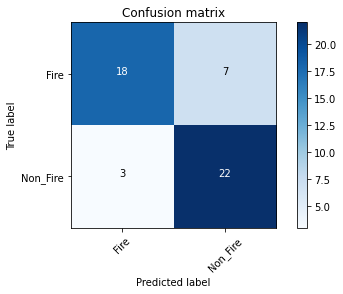

In [ ]:
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix

raw_pred = model.predict(test_data)
y_pred = []

for i in raw_pred:
  y_pred.append(0 if i<0.5 else 1)

print(classification_report(test_labels, y_pred))
# print(y_pred, len(y_pred))
# print("\n\n\n\n")
# print(test_labels, test_labels.shape)
conf_mat = confusion_matrix(test_labels, y_pred)
plot_confusion_matrix(conf_mat, classes=["Fire", "Non_Fire"])

In [ ]:
model.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 75ms/step - loss: 26.6174 - accuracy: 0.8000


[26.617353439331055, 0.800000011920929]

In [ ]:
model.save("/content/drive/MyDrive/Project/Model_Train87_Val92_Test80")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Project/Model_Train87_Val92_Test80/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Project/Model_Train87_Val92_Test80/assets
